In [1]:
%%html
<style type="text/css">
  span.ecb { background: yellow; }
</style>

# ATMO 5331 - Homework 1 - Fall 2021
## Due 7 Sep, 2021


When doing this homework, remember that you have two jobs:
1. Make it work.
2. Clean it up so that I can understand what you've done. If you think I might not understand, document it with a comment or a function docstring.

You should present your work with a clear logical progression. If that seems like a hassle, remember that in doing so you are practicing skills that are expected in your thesis and journal publications.

You may work alone or in pairs. I will not be adjudicating relative level of effort in group work, so you are responsible for ensuring that you and your partner contribute equally.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

mcom_lon, mcom_lat = -101.8803718553, 33.5818617015
mcom_alt = 957.179

**1.** Create the 1D arrays `lon` and `lat`, centered on MCOM and incrementing by 5 degrees. There should be 7 longitude and 5 latitude values. (10 pts.)

The sample code also includes data array `d` with the shape (`nlat`, `nlon`), and defines some values so that we all have the same dataset. A plot of the data array in index coordintes is also included.

Together these arrays define the grid cell center locations and corresponding data values.

[-116.88037186 -111.88037186 -106.88037186 -101.88037186  -96.88037186
  -91.88037186  -86.88037186]
[23.5818617 28.5818617 33.5818617 38.5818617 43.5818617]


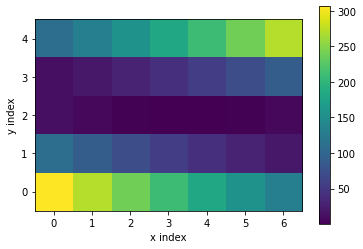

In [3]:
#Here, we define the shape of the array, and the coordinates for two 1D arrays centered on MCom

nlon = 7
nlat = 5
dlon, dlat = 5.0, 5.0

d = (np.arange(nlon*nlat) - (nlon*nlat/2.0))**2.0
d.shape = (nlat, nlon)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower')
plt.colorbar(im)
ax.set_xlabel('x index')
ax.set_ylabel('y index')

lon = np.array([mcom_lon - 15, mcom_lon -10 , mcom_lon - 5, mcom_lon, mcom_lon + 5, mcom_lon + 10, mcom_lon + 15])
lat = np.array([mcom_lat - 10, mcom_lat - 5, mcom_lat, mcom_lat + 5, mcom_lat + 10])
print(lon)
print(lat)

<span class="ecb">Correct, 10/10</span>

**2.** Since the image is regularly gridded in lon/lat We can use the `extent` keyword argument to `imshow` to specify the bounds of the image, as you see below. Is this plot correct or incorrect? Explain how the `extent` keyword argument works using the language of centers, edges, and nodes. (10 pts.)

`print(ax.axis())` might be useful in understanding what you are seeing.

(-116.8803718553, -86.8803718553, 23.581861701500003, 43.5818617015)


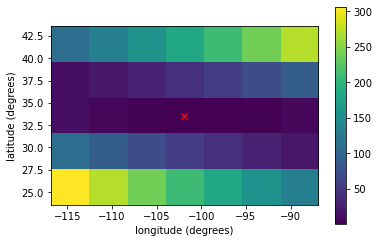

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.imshow(d, origin='lower', extent=(lon.min(), lon.max(), lat.min(), lat.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

print(ax.axis())

ANSWER:the extent function in python works as a bound when plotting a function. You could also define it as extent is setting the outter most edge of our image. On a smaller scale, each node is a intersection of a lon and lat specified in the array. For if this plot is correct, it depends on which way you consider correct. The X is in the center of what would be the lon and lat of Lubbock. But what I would change to make it "more correct" would be adding one more point on each side of the plot so then we could have the incoming data for the plot, just a personal preference though. But you could also say it is correct as the values of the edges are the "points" of each value of lat and lon. But also with this, shouldn't the X be on the node/intersection of the grid? 

<span class="ecb">It is more firmly not correct than you are stating it. The grid cell centers for the outer boxes are progressively mislocated. Your answer indicates you suspect something is off, but you haven't gone far enough in determining whether it meets the standards we set in class. 6/10.</span>

**3.** Write a function that converts 1D center positions to edge positions. Use the closest adjacent spacing to extend the start and end of the array. Use this function to create two arrays `lat_edge` and `lon_edge` and print their values. Is the new figure created with `imshow` correct? Explain your answer. (20 pts.)

[-119.38037186 -114.38037186 -109.38037186 -104.38037186  -99.38037186
  -94.38037186  -89.38037186  -84.38037186]
[21.0818617 26.0818617 31.0818617 36.0818617 41.0818617 46.0818617]


Text(0, 0.5, 'latitude (degrees)')

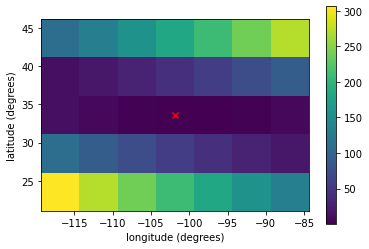

In [10]:
#defining our fuction to create a new array for the original arrays that will have the lon/lat points as the center of the
#  the pixels and not the edges

def centers_to_edges_1d(x):
    dis = 2.5
    return np.arange(min(x) - dis, max(x) + 2*dis, 2*dis)
    
lon_edge = centers_to_edges_1d(lon)
lat_edge = centers_to_edges_1d(lat)
print(lon_edge)
print(lat_edge)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower', extent=(lon_edge.min(), lon_edge.max(), lat_edge.min(), lat_edge.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

# Answer: I think this is more correct in my opinion, as there is the addition of the extra bit of a edge. Also using this,
#  the center of each pixel is now each point centering Mcom, thus our x is now the true center. 

<span class="ecb">Yes, this one is correct. The `centers_to_edges` function needs to determine the spacing from `x` alone. 18/20.</span>

**4.** `imshow` works for the data so far because we have a regular grid with even spacing, so we only need to specify the corners. For a more general quadrilateral mesh, we can use `pcolormesh` to create a similar plot. What, if anything, is different about these plots compared to the first two? (10 pts.)

<ipython-input-6-ac94922340c1>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(lon, lat, d)


Text(0, 0.5, 'latitude (degrees)')

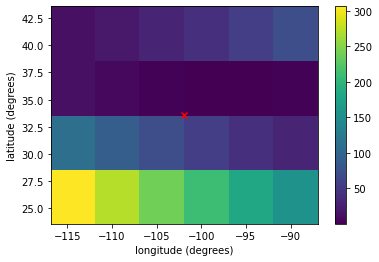

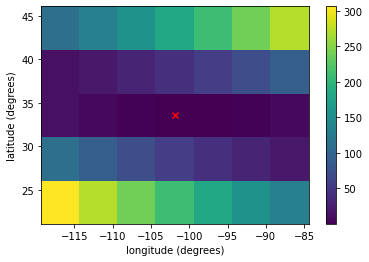

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon, lat, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')


fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon_edge, lat_edge, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

ANSWER: These look like they are spacing the grids in a mannar that we would normally associate with a map. These pixels are more rectangular than those in the first two plots. As well as the grid axis ticks are further spaced out. 

<span class="ecb">Missing a row and column of data in the first plot. What do you notice about the MCOM center position? 6/10.</span>

**5.** So far, you have used 1D coordinate arrays, and things worked fine because the data were regularly gridded. `pcolormesh` will also accept 2D coordinate arrays. The function `np.meshgrid` creates 2D arrays from 1D arrays. Use `meshgrid` to create these 2D coordinate arrays and use them to make a plot of the data using `pcolormesh`. It should match the correct plot(s) above (20 pts.).

In [7]:
np.meshgrid?

Signature: np.meshgrid(*xi, copy=True, sparse=False, indexing='xy')
Docstring:
Return coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of
N-D scalar/vector fields over N-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.

.. versionchanged:: 1.9
   1-D and 0-D cases are allowed.

Parameters
----------
x1, x2,..., xn : array_like
    1-D arrays representing the coordinates of a grid.
indexing : {'xy', 'ij'}, optional
    Cartesian ('xy', default) or matrix ('ij') indexing of output.
    See Notes for more details.

    .. versionadded:: 1.7.0
sparse : bool, optional
    If True a sparse grid is returned in order to conserve memory.
    Default is False.

    .. versionadded:: 1.7.0
copy : bool, optional
    If False, a view into the original arrays are returned in order to
    conserve memory.  Default is True.  Please note that
    ``sparse=False, copy=False`` will likely return non-contiguous
    arrays.  Furthermore, mo

In [8]:
lon_edge_2d, lat_edge_2d = np.meshgrid(lon_edge, lat_edge)
print(d)
print(lat_edge_2d)
print(lon_edge_2d)

print(lat_edge_2d.shape)
print(lon_edge_2d.shape)


[[3.0625e+02 2.7225e+02 2.4025e+02 2.1025e+02 1.8225e+02 1.5625e+02
  1.3225e+02]
 [1.1025e+02 9.0250e+01 7.2250e+01 5.6250e+01 4.2250e+01 3.0250e+01
  2.0250e+01]
 [1.2250e+01 6.2500e+00 2.2500e+00 2.5000e-01 2.5000e-01 2.2500e+00
  6.2500e+00]
 [1.2250e+01 2.0250e+01 3.0250e+01 4.2250e+01 5.6250e+01 7.2250e+01
  9.0250e+01]
 [1.1025e+02 1.3225e+02 1.5625e+02 1.8225e+02 2.1025e+02 2.4025e+02
  2.7225e+02]]
[[21.0818617 21.0818617 21.0818617 21.0818617 21.0818617 21.0818617
  21.0818617 21.0818617]
 [26.0818617 26.0818617 26.0818617 26.0818617 26.0818617 26.0818617
  26.0818617 26.0818617]
 [31.0818617 31.0818617 31.0818617 31.0818617 31.0818617 31.0818617
  31.0818617 31.0818617]
 [36.0818617 36.0818617 36.0818617 36.0818617 36.0818617 36.0818617
  36.0818617 36.0818617]
 [41.0818617 41.0818617 41.0818617 41.0818617 41.0818617 41.0818617
  41.0818617 41.0818617]
 [46.0818617 46.0818617 46.0818617 46.0818617 46.0818617 46.0818617
  46.0818617 46.0818617]]
[[-119.38037186 -114.38037186 

Text(0, 0.5, 'latitude (degrees)')

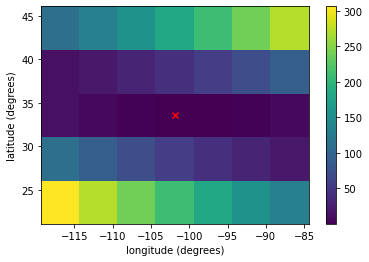

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon_edge_2d, lat_edge_2d, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

<span class="ecb">Correct, 10/10.</span>